# All Regression Notebook
## Load dữ liệu
Khai báo và load thư viện, sau đó load tập dữ liệu. Do tập dữ liệu không chứa tên cột nên chúng ta cần thêm nó vào bằng cách sử dụng list Python thủ công. 

Chúng ta có `all_train_data` và `all_test_data` đã được nối vào `DataFrame` tương ứng.

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

columns_name = ["Popularity", "Check-in", "Activities", "Category"] \
            + ["F_{:d}".format(i) for i in range(1, 26)] \
            + ["CC{:d}".format(i) for i in range(1, 6)] \
            + ["Base time", "Post length", "Post count", "Post promotion", "Span time"] \
            + ["Post_date_{:d}".format(i) for i in range(1, 8)] \
            + ["Base_date_{:d}".format(i) for i in range(1, 8)] \
            + ["Span count"]

# list of train data from training files
all_train_data = [pandas.read_csv("Dataset/Training/Features_Variant_{:d}.csv".format(d), header=None) for d in range(1, 6)]
for data in all_train_data:
    print("Train sets size: {:d}".format(data.size))
# Viết code nối dữ liệu huấn luyện
train_data = pandas.concat(all_train_data)
train_data.columns = columns_name

# list of test data from test files
all_test_data = [pandas.read_csv("Dataset/Testing/TestSet/Test_Case_{:d}.csv".format(d), header=None) for d in range(1, 10)]
for data in all_test_data:
    print("Test set size: {:d}".format(data.size))
# Viết code nối dữ liệu kiểm tra
test_data = pandas.concat(all_test_data)
test_data.columns = columns_name

train_data["bias"] = 1
test_data["bias"] = 1

train_data.head()


Train sets size: 2211246
Train sets size: 4390848
Train sets size: 6539292
Train sets size: 8662896
Train sets size: 10747620
Test set size: 5400
Test set size: 5400
Test set size: 5400
Test set size: 5400
Test set size: 5400
Test set size: 5400
Test set size: 5400
Test set size: 5400
Test set size: 5400


,Popularity,Check-in,Activities,Category,F_1,F_2,F_3,F_4,F_5,F_6,...,Post_date_7,Base_date_1,Base_date_2,Base_date_3,Base_date_4,Base_date_5,Base_date_6,Base_date_7,Span count,bias
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,1
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,1,0,0,0,0,0,0,1
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,1,0,0,0,0,1


## Lựa chọn hạng mục phụ
Cột Category chứa các index bất kỳ của hạng mục dữ liệu liên quan tới bản chất của chính bài đăng. Để đơn giản, chúng ta sẽ sử dụng hạng mục có lượng dữ liệu lớn nhất để thực hiện Hồi quy Tuyến tính.

Tìm và lựa chọn hạng mục có nhiều bản ghi nhất sử dụng pandas. Lưu nó trong biến `largest_category`

In [2]:
# Viết code ở đây:
# return a series
# largest_category = train_data['Category'].mode()

largest_category = train_data['Category'].value_counts().idxmax()
largest_category

9

In [3]:
# Phân hạng các mô hình
# Chọn data có phân hạng category có nhiều records nhất và drop cột 'Category'
train_data = train_data.loc[train_data['Category'] == largest_category].drop('Category', axis=1)
test_data = test_data.loc[test_data['Category'] == largest_category].drop('Category', axis=1)

label = "Span count"
features = [col for col in train_data.columns if col != label]

train_features = train_data[ features ]
train_labels = train_data[ label ]
test_features = test_data[ features ]
test_labels = test_data[ label ]

In [4]:
train_features

,Popularity,Check-in,Activities,F_1,F_2,F_3,F_4,F_5,F_6,F_7,...,Post_date_6,Post_date_7,Base_date_1,Base_date_2,Base_date_3,Base_date_4,Base_date_5,Base_date_6,Base_date_7,bias
349,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,...,0,0,0,1,0,0,0,0,0,1
350,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,...,0,0,0,0,0,1,0,0,0,1
351,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,...,0,0,0,0,0,1,0,0,0,1
352,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,...,0,1,0,0,1,0,0,0,0,1
353,1552629,0,64641,0.0,910.0,159.701923,125.0,153.676163,0.0,621.0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199025,7170111,70,497000,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,...,0,0,0,0,0,1,0,0,0,1
199026,7170111,70,497000,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,...,0,0,0,0,0,1,0,0,0,1
199027,7170111,70,497000,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,...,0,0,0,0,0,1,0,0,0,1
199028,7170111,70,497000,0.0,2164.0,466.975207,244.0,497.966169,0.0,1990.0,...,0,0,0,0,0,0,1,0,0,1


## Tương quan cơ bản
Chúng ta sẽ vẽ ma trận tương quan giữa các biến CC. Tương quan rất hữu ích để xem liệu các đặc trưng có kết nối quá chặt chẽ không -  chúng ta không muốn chúng cùng nhau vì chúng sẽ tạo ra nhiễu giả gây overfit mô hình.

In [5]:
# Correlation matrix of CC variables
cc = pandas.DataFrame(train_features.loc[:, 'CC1':'CC5']).corr().round(2)
cc

,CC1,CC2,CC3,CC4,CC5
CC1,1.00,0.58,0.67,1.00,-0.05
CC2,0.58,1.00,0.07,0.61,0.69
CC3,0.67,0.07,1.00,0.66,-0.67
CC4,1.00,0.61,0.66,1.00,-0.03
CC5,-0.05,0.69,-0.67,-0.03,1.00


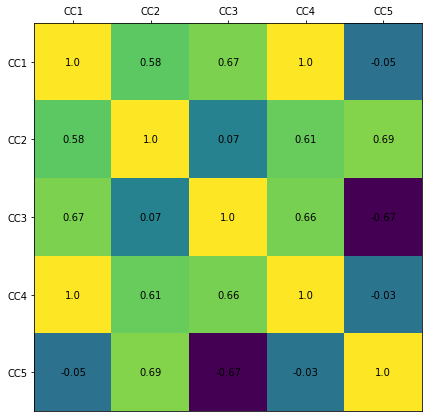

In [6]:
# Viết code ở đây:
ticks_names = ['CC{:d}'.format(i) for i in range(1, 6)]

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cc)

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xticks(np.arange(len(ticks_names)))
ax.set_yticks(np.arange(len(ticks_names)))
ax.set_xticklabels(ticks_names)
ax.set_yticklabels(ticks_names)

# Loop over data dimensions and create text annotations.
for i in range(len(ticks_names)):
    for j in range(len(ticks_names)):
        text = ax.text(j, i, cc.iloc[i, j],
                       ha="center", va="center", color="k")

fig.tight_layout()
plt.show()

## Xây dựng mô hình Hồi quy

__Nhiệm vụ của chúng ta là dự đoán số lượng bình luận bài đăng sẽ nhận được (cột "Span count")__ <br>
"Span time" thì cần thiết trong khi tất cả các cột khác tùy chọn. <br>
Thử mô hình Hồi quy đa biến đơn giản chỉ có các đặc trưng cơ bản: <br>
["Popularity", "Base time", "Post length", "Post count", "Span time", "bias"]. <br>

In ra hệ số MSE từ sklearn hoặc RSS từ khóa học cho cả tập huấn luyện và tập kiểm tra.

In [7]:
def rss_calculate(predicts, output):
    """Calculate RSS"""
    return sum((predicts - output) ** 2)

In [8]:
# Viết code ở đây:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Training features & training labels
simple_feature_titles = ['Popularity', 'Base time', 'Post length', 'Post count', 'Span time', 'bias']
simple_train_features = train_features.loc[:, simple_feature_titles].values
simple_train_labels = train_labels.values

# Test features & test labels
simple_test_features = test_features.loc[:, simple_feature_titles].values
simple_test_labels = test_labels.values

# Multi-variables LinearRegression model on 6 simple features
linear = LinearRegression()
linear.fit(simple_train_features, simple_train_labels)

# Predictions on training set & test set
simple_train_predicts = linear.predict(simple_train_features)
simple_test_predicts = linear.predict(simple_test_features)

# MSE of training set & test set
simple_train_mse = mean_squared_error(simple_train_predicts, simple_train_labels)
simple_test_mse = mean_squared_error(simple_test_predicts, simple_test_labels)

# RSS of training set & test set
simple_train_rss = rss_calculate(simple_train_predicts, simple_train_labels)
simple_test_rss = rss_calculate(simple_test_predicts, simple_test_labels)

print(f'Train set:\n  - MSE: {simple_train_mse: .4E}\n  - RSS: {simple_train_rss: .4E}')
print()
print(f'Test set:\n  - MSE: {simple_test_mse: .4E}\n - RSS: {simple_test_rss: .4E}')

Train set:
  - MSE:  1.6896E+03
  - RSS:  1.8638E+08

Test set:
  - MSE:  5.3406E+03
 - RSS:  1.3939E+06


### Hãy thử cải thiện với nhiều đặc trưng hơn
Không phải mô hình tốt nhất chúng ta có thể sử dụng. Chúng ta có thể thử thêm nhiều đặc trưng liên quan. <br>Nối tất cả các thuộc tính CC vào các đặc trưng và thử lại với cùng số liệu.

In [9]:
# Viết code ở đây:
# Training features and labels data
simple_feature_titles_with_cc = simple_feature_titles + ['CC{:d}'.format(i) for i in range(1, 6)]
simple_train_features_with_cc = train_features.loc[:, simple_feature_titles_with_cc].values
simple_train_labels = train_labels.values

# Test features and labels data
simple_test_features_with_cc = test_features.loc[:, simple_feature_titles_with_cc].values
simple_test_labels = test_labels.values

# LinearRegression model on all features
linear_with_cc = LinearRegression()
linear_with_cc.fit(simple_train_features_with_cc, simple_train_labels)

# Train and test predictions
simple_train_predicts_with_cc = linear_with_cc.predict(simple_train_features_with_cc)
simple_test_predicts_with_cc = linear_with_cc.predict(simple_test_features_with_cc)

# MSE of train and test set
simple_train_mse_with_cc = mean_squared_error(simple_train_predicts_with_cc, simple_train_labels)
simple_test_mse_with_cc = mean_squared_error(simple_test_predicts_with_cc, simple_test_labels)

# RSS of train and test set
simple_train_rss_with_cc = rss_calculate(simple_train_predicts_with_cc, simple_train_labels)
simple_test_rss_with_cc = rss_calculate(simple_test_predicts_with_cc, simple_test_labels)

print(f'Train set:\n  - MSE: {simple_train_mse_with_cc: .4E}\n  - RSS: {simple_train_rss_with_cc: .4E}')
print()
print(f'Test set:\n  - MSE: {simple_test_mse_with_cc: .4E}\n - RSS: {simple_test_rss_with_cc: .4E}')

Train set:
  - MSE:  1.5350E+03
  - RSS:  1.6933E+08

Test set:
  - MSE:  3.8785E+03
 - RSS:  1.0123E+06


Bài học rút ra: Tối ưu hóa sớm hiếm khi hữu ích. 

## Giải quyết overfit
### Áp dụng cách giải cho overfit

Sự khác biệt về hệ số huấn luyện và kiểm tra chỉ ra mô hình có thể overfitting. Hãy thử sửa chữa. Mở rộng hồi quy [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) (cv = 10) với alpha dọc theo logspace giữa 0 và 10, ghi nhận giá trị có chất lượng tốt nhất thành biến `best_alpha`, và *có thể tùy chọn vẽ một đồ thị cho độ lớn của các hệ số*.

In [10]:
# Viết code ở đây:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# scale 6 simple features with CC features
scaler_with_cc = StandardScaler()
scaled_simple_train_features_with_cc = scaler_with_cc.fit_transform(simple_train_features_with_cc)

# Ridge model for 11 features
l2_penalty = np.logspace(0, 10, num=11)
ridgecv_with_cc = RidgeCV(alphas=l2_penalty, cv=10)
ridgecv_with_cc.fit(scaled_simple_train_features_with_cc, simple_train_labels)
best_alpha = ridgecv_with_cc.alpha_
best_alpha

1000.0

In [11]:
# scaled 11 simple test features
scaled_simple_test_features_with_cc = scaler_with_cc.transform(simple_test_features_with_cc)

# predict on test features
ridgecv_simple_test_with_cc_predicts = ridgecv_with_cc.predict(scaled_simple_test_features_with_cc)
# predict on train features
ridgecv_simple_train_with_cc_predicts = ridgecv_with_cc.predict(scaled_simple_train_features_with_cc)

# mse and rss of train set
ridgecv_simple_train_with_cc_mse = mean_squared_error(ridgecv_simple_train_with_cc_predicts, simple_train_labels)
ridgecv_simple_train_with_cc_rss = rss_calculate(ridgecv_simple_train_with_cc_predicts, simple_train_labels)

# mse and rss of test set
ridgecv_simple_test_with_cc_mse = mean_squared_error(ridgecv_simple_test_with_cc_predicts, simple_test_labels)
ridgecv_simple_test_with_cc_rss = rss_calculate(ridgecv_simple_test_with_cc_predicts, simple_test_labels)
                                                
print('RIDGE WITH CC (11 features)')
print(f'Train set:\n  - MSE: {ridgecv_simple_train_with_cc_mse: .4E}\n  - RSS: {ridgecv_simple_train_with_cc_rss: .4E}')
print()
print(f'Test set:\n  - MSE: {ridgecv_simple_test_with_cc_mse: .4E}\n - RSS: {ridgecv_simple_test_with_cc_rss: .4E}')

RIDGE WITH CC (11 features)
Train set:
  - MSE:  1.5351E+03
  - RSS:  1.6935E+08

Test set:
  - MSE:  3.8788E+03
 - RSS:  1.0124E+06


In [12]:
# Dictionary of {weight[i]: [weight[i]'s values on each value of l2_penalty]}
weights = {}
# Initialize each weight with an empty list
for k in range(len(simple_feature_titles_with_cc)):
    weights[k+1] = []

# Loop through RidgeCV with each value of l2_penalty to get value of each weight on that l2_penalty
for i in range(len(l2_penalty)):
    ridgecv_single_alpha = RidgeCV(alphas=[l2_penalty[i]], cv=10)
    ridgecv_single_alpha.fit(scaled_simple_train_features_with_cc, simple_train_labels)
    
    # Add each weight value to its key
    for j in range(len(ridgecv_single_alpha.coef_)):
        weights[j + 1] += [ridgecv_single_alpha.coef_[j]]

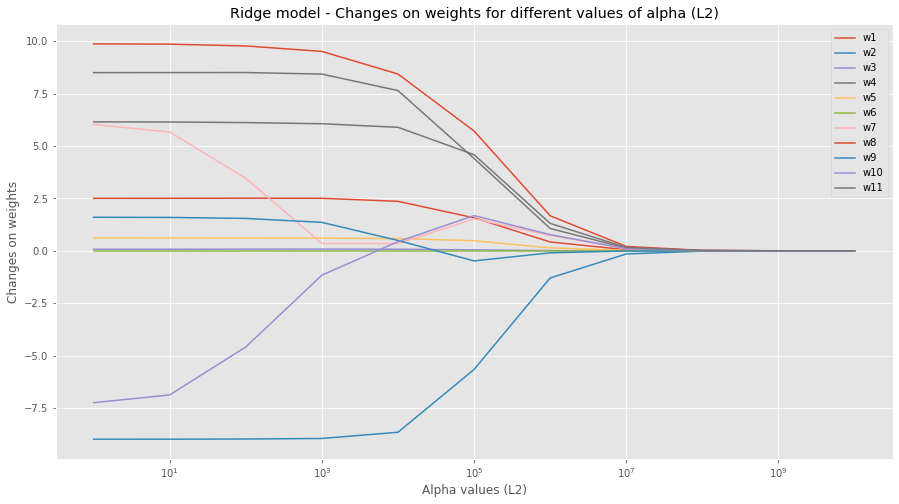

In [13]:
# Plot of change in each weight on each value of l2_penalty
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))
plt.xscale('log')
for k, v in weights.items():
    ax.plot(l2_penalty, v, label=f'w{k}')
    
ax.set_title('Ridge model - Changes on weights for different values of alpha (L2)')
ax.set_xlabel('Alpha values (L2)')
ax.set_ylabel('Changes on weights')
plt.legend(loc='upper right')
plt.show()

### Thử Hồi quy RidgeCV trên mọi cột
Nó đã hoạt động, nhưng chúng ta cần tự hỏi liệu có tiếp tục sử dụng tập đặc trưng không hoàn thiện thay vì một tập hợp tối ưu nữa không. Mở rộng các đặc trưng cho tất cả các cột trừ nhãn được chỉ định. Hãy chạy và xem điều gì sẽ xảy ra.

In [14]:
# scale all training features
scaler_all_features = StandardScaler()
train_features_all = train_features.values
scaled_train_features_all = scaler_all_features.fit_transform(train_features_all)

# scale all test features
test_features_all = test_features.values
scaled_test_features_all = scaler_all_features.transform(test_features_all)

# RidgeCV model on all features
ridgecv_all_features = RidgeCV(alphas=l2_penalty, cv=10)
ridgecv_all_features.fit(scaled_train_features_all, train_labels)

# predict outputs from train set and test set
ridgecv_train_features_all_predicts = ridgecv_all_features.predict(scaled_train_features_all)
ridgecv_test_features_all_predicts = ridgecv_all_features.predict(scaled_test_features_all)

# mse and rss of train set
ridgecv_train_features_all_mse = mean_squared_error(ridgecv_train_features_all_predicts, simple_train_labels)
ridgecv_train_features_all_rss = rss_calculate(ridgecv_train_features_all_predicts, simple_train_labels)

# mse and rss of test set
ridgecv_test_features_all_mse = mean_squared_error(ridgecv_test_features_all_predicts, simple_test_labels)
ridgecv_test_features_all_rss = rss_calculate(ridgecv_test_features_all_predicts, simple_test_labels)

print('RIDGECV WITH ALL FEATURES')
print(f'Train set:\n  - MSE: {ridgecv_train_features_all_mse: .4E}\n  - RSS: {ridgecv_train_features_all_rss: .4E}')
print()
print(f'Test set:\n  - MSE: {ridgecv_test_features_all_mse: .4E}\n  - RSS: {ridgecv_test_features_all_rss: .4E}')

RIDGECV WITH ALL FEATURES
Train set:
  - MSE:  1.5123E+03
  - RSS:  1.6682E+08

Test set:
  - MSE:  3.9284E+03
  - RSS:  1.0253E+06


## Lựa chọn đặc trưng
### Áp dụng LASSO
Chúng ta có thể cắt tỉa các đặc trưng sử dụng những gì đã học. Lần này sẽ ghi lại các đặc trưng đã chọn của [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) (cv = 10) sử dụng biến `lasso_selected_features`, và <i>có thể tùy chọn vẽ một đồ thị giữa số lượng đặc trưng đã loại và các giá trị alpha</i>.

In [15]:
# Viết code ở đây:
from sklearn.linear_model import LassoCV

# features's and label's names
label = 'Span count'
features = [col for col in train_data.columns if col != label]

# extract train and test data
train_features = train_data[features].values
train_labels = train_data[label].values
test_features = test_data[features].values
test_labels = test_data[label].values

# scale all features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# LassoCV
multi_model = LassoCV(alphas=np.arange(0.001, 0.01, 0.001), cv=10, max_iter=5000, tol=0.001)
multi_model.fit(train_features, train_labels)
test_predictions = multi_model.predict(test_features)

# test and train mse
test_mse_score = mean_squared_error(test_labels, test_predictions)
train_mse_score = mean_squared_error(train_labels, multi_model.predict(train_features))
print("MSE on training: {:.4f}; MSE on test: {:.4f}".format(train_mse_score, test_mse_score))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669879.9585820287, tolerance: 198979.06167705357
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3845936.786735326, tolerance: 198979.06167705357
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11821204.096097603, tolerance: 198979.06167705357
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Convergenc

MSE on training: 1512.5207; MSE on test: 3986.8193


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.235e+07, tolerance: 2.254e+05
  model = cd_fast.enet_coordinate_descent(


In [16]:
multi_model.alpha_

0.001

In [17]:
np.count_nonzero(multi_model.coef_)

48

In [18]:
# selected features from lasso model with alpha=0.0006
lasso_selected_features_index = np.argwhere(multi_model.coef_ != 0).reshape(1, -1)[0]
lasso_selected_features = [features[i] for i in lasso_selected_features_index]
print(lasso_selected_features)

['Popularity', 'Check-in', 'Activities', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8', 'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_18', 'F_19', 'F_20', 'F_21', 'F_22', 'F_23', 'F_24', 'F_25', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time', 'Post length', 'Post count', 'Span time', 'Post_date_1', 'Post_date_2', 'Post_date_3', 'Post_date_4', 'Post_date_5', 'Post_date_6', 'Base_date_2', 'Base_date_3', 'Base_date_4', 'Base_date_5', 'Base_date_6', 'Base_date_7']


In [19]:
# Viết code ở đây:
from sklearn.linear_model import Lasso

# list of number of features excluded on each alpha
excluded_weights_num = []
alphas = np.arange(0.01, 0.1, 0.01)
total_features = len(features)

for i in alphas:
    lasso = Lasso(alpha=i, max_iter=3000)
    lasso.fit(train_features, train_labels)
    excluded_weights_num.append(total_features - np.count_nonzero(lasso.coef_))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+06, tolerance: 2.254e+04
  model = cd_fast.enet_coordinate_descent(


In [20]:
print(excluded_weights_num)

[11, 19, 18, 19, 22, 25, 27, 27, 27]


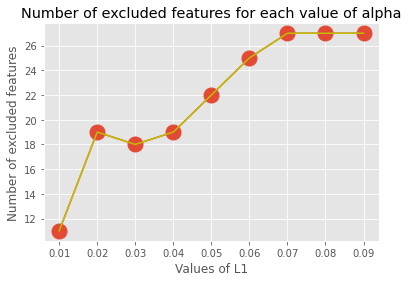

In [21]:
# plot number of features excluded on values of L1
plt.plot(alphas, excluded_weights_num, marker='.', markersize=30)
plt.plot(alphas, excluded_weights_num, 'y-')
plt.title('Number of excluded features for each value of alpha')
plt.xlabel('Values of L1')
plt.ylabel('Number of excluded features')
plt.show()

### Xây dựng mô hình chặt chẽ hơn với các đặc trưng đã chọn
Khi thực hiện lựa chọn đặc trưng, chúng ta có thể sẽ phải thêm lại độ chệch vào list các đặc trưng. Hãy sử dụng các đặc trưng đã chọn để xây dựng mô hình và tính toán chất lượng dựa trên các chỉ số.

In [22]:
if("bias" not in lasso_selected_features):
    lasso_selected_features.append('bias')

In [23]:
# Viết code ở đây:
# get selected train and test features from lasso
selected_features_index = lasso_selected_features_index.reshape(1, -1)[0]
scaled_train_selected_features = train_features[:, selected_features_index]
scaled_test_selected_features = test_features[:, selected_features_index]

# RidgeCV model on selected features
l2_penalty = np.logspace(0, 10, num=21)
ridgecv = RidgeCV(alphas=l2_penalty, cv=10)
ridgecv.fit(scaled_train_selected_features, train_labels)

RidgeCV(alphas=array([1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05, 3.16227766e+05,
       1.00000000e+06, 3.16227766e+06, 1.00000000e+07, 3.16227766e+07,
       1.00000000e+08, 3.16227766e+08, 1.00000000e+09, 3.16227766e+09,
       1.00000000e+10]),
        cv=10)

In [24]:
# predictions of ridge model on selected features
ridgecv_train_predicts = ridgecv.predict(scaled_train_selected_features)
ridgecv_test_predicts = ridgecv.predict(scaled_test_selected_features)

# mse of train and test sets
ridgecv_train_mse = mean_squared_error(train_labels, ridgecv_train_predicts)
ridgecv_test_mse = mean_squared_error(test_labels, ridgecv_test_predicts)

# rss of train and test sets
ridgecv_train_rss = rss_calculate(train_labels, ridgecv_train_predicts)
ridgecv_test_rss = rss_calculate(test_labels, ridgecv_test_predicts)

print('RIDGECV WITH SELECTED FEATURES FROM LASSO')
print(f'Train set:\n  MSE: {ridgecv_train_mse: .4E}\n  RSS: {ridgecv_train_rss: .4E}')
print()
print(f'Test set:\n  MSE: {ridgecv_test_mse: .4E}\n  RSS: {ridgecv_test_rss: .4E}')

RIDGECV WITH SELECTED FEATURES FROM LASSO
Train set:
  MSE:  1.5123E+03
  RSS:  1.6682E+08

Test set:
  MSE:  3.9321E+03
  RSS:  1.0263E+06


## Kết hợp mọi thứ trên một mô hình
LASSO đã thực hiện rất tốt, thu nhỏ các đặc trưng nhiễu và không cần thiết, tăng tốc độ tính toán. Bây giờ hãy kết hợp cả 2 kỹ thuật trước đó vào cùng một mô hình.

In [25]:
def errors(model, features, labels):
    """Calculate MSE and RSS of a fitted model on input data"""
    
    predicts = model.predict(features)
    
    mse = mean_squared_error(labels, predicts)
    rss = rss_calculate(labels, predicts)
    
    return (mse, rss)

In [26]:
# Viết code ở đây:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Scale train and test features
ss = StandardScaler()
scaled_train_features_all = ss.fit_transform(train_features_all)
scaled_test_features_all = ss.transform(test_features_all)

# Run LassoCV to select features
lasso = LassoCV(alphas=np.arange(0.001, 0.01, 0.001), cv=10, max_iter=5000)
lasso.fit(scaled_train_features_all, train_labels)

# Extract selected features
selected_features_index = np.argwhere(lasso.coef_ != 0).reshape(1, -1)[0]
selected_features = [features[i] for i in selected_features_index]

# Run RidgeCV on selected features
ridge = RidgeCV(alphas=l2_penalty, cv=10)
ridge.fit(scaled_train_features_all[:, selected_features_index], train_labels)

# mse and rss of train set and test set
train_mse, train_rss = errors(ridge, scaled_train_features_all[:, selected_features_index], train_labels)
test_mse, test_rss = errors(ridge, scaled_test_features_all[:, selected_features_index], test_labels)

print(f'Number of features: {np.count_nonzero(lasso.coef_)}')
print(f'Train set\n  MSE {train_mse: .4E}\n  RSS {train_rss: .4E}')
print(f'Test set\n  MSE {test_mse: .4E}\n  RSS {test_rss: .4E}')

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142607.17319753766, tolerance: 19897.906167705358
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25247.17627108097, tolerance: 19897.906167705358
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180524.13317477703, tolerance: 19897.906167705358
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Convergen

Number of features: 48
Train set
  MSE  1.5123E+03
  RSS  1.6682E+08
Test set
  MSE  3.9321E+03
  RSS  1.0263E+06


### Phân phối sai số bình phương
Chúng ta hãy đưa ra kết luận; lưu ý thêm, hãy quan sát cách các sai số bình phương được phân phối.

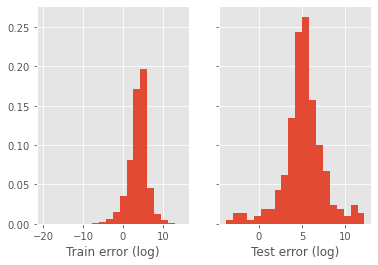

In [27]:
train_square_errors = np.log( (train_labels - multi_model.predict(train_features)) ** 2 )
test_square_errors = np.log( (test_labels - test_predictions) ** 2 )
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharey=True)
train_ax.hist(train_square_errors, bins=20, density=True)
train_ax.set_xlabel("Train error (log)")
test_ax.set_xlabel("Test error (log)")
test_ax.hist(test_square_errors, bins=20, density=True)
plt.show()